
# Exploratory Data Analysis Notebook

This notebook is going to be comprised of several different sections:

1. Reading and cleaning the data from CSV file
2. Dataframe seperation stuff age height weight
3. Understanding our research group (n=126) population visually, representing their demographics in terms of gender, age, preferred climbing discipline and something else??
4. Something else
5. Something else lol


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Introduction Section

For our data analysis, I wanted to start by trying to understand our research group by representing some basic demographics
To represent this, a series of charts were created, visualizing information such as gender, age, and preferred climbing disciplines.



In [4]:
dataframe = pd.read_csv('Climbing Critical Force Data - Giles et al 2020.csv')
#take seperate entries for male and female


# Pieplot for Gender, Age

sick meme


<AxesSubplot:ylabel='AGE'>

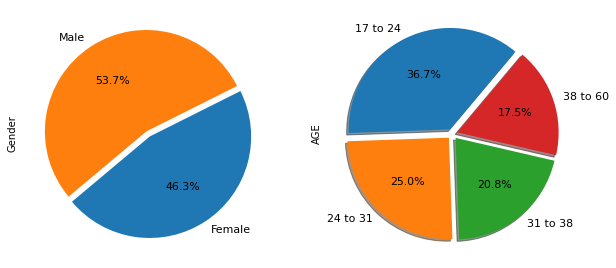

In [5]:
#gender pie chart
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10 , 10))
gender_explode = (0.03,0.03)

gender_df = dataframe['SEX'].dropna().to_frame()
gender_pie = gender_df.groupby(by='SEX').size()

gender_pie.plot.pie(autopct="%.1f%%", fontsize=11, label="Gender", ax=ax1, explode=gender_explode, startangle = 220)


#age pie chart
#will switch to bar eventually as this looks like shit
age_bins = [17, 24, 31, 38, 60]
age_bins_labels = ['17 to 24', '24 to 31', '31 to 38', '38 to 60']
age_explode = (0.05, 0.05, 0.05, 0.05)

age_df = dataframe['AGE (YRS)'].dropna().to_frame()
age_pie = pd.cut(age_df['AGE (YRS)'], bins=age_bins).to_frame()

age_pie.value_counts().plot(kind='pie', autopct="%.1f%%", fontsize=11,
                            label="AGE", labels=age_bins_labels, startangle=50,
                            explode=age_explode, shadow=True, ax=ax2)


## Scatterplot Height (CM) vs Weight (KG)


<AxesSubplot:xlabel='HEIGHT (CM)', ylabel='BODY MASS (KG)'>

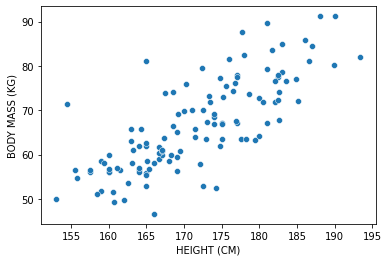

In [6]:
#Create a seperate dataframe and store both height and weight values
hweight_df = dataframe[['HEIGHT (CM)','BODY MASS (KG)']].dropna()

#Create Seaborn Scatterplot
sns.scatterplot(data=hweight_df, x="HEIGHT (CM)", y="BODY MASS (KG)")

## Climbing Discipline Sport vs Bouldering vs Both

Will be fixed in the future
Currently hardcoded my both disciplines value, as I couldn't figure out a logical way to do it without. 


In [35]:
# TO FIND VALUES FOR BOTH

dataframe[['SPORT GRADE IRCRA', 'BOULDER GRADE IRCRA']].dropna().count().to_frame()

,0
SPORT GRADE IRCRA,31
BOULDER GRADE IRCRA,31


[(0.0, 120.0)]

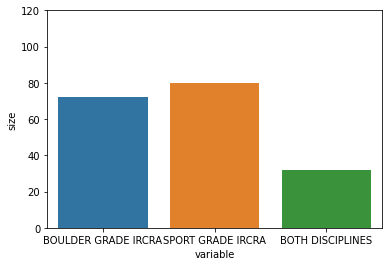

In [33]:
#Create a dataframe disciplines, so I can more easily work with pandas through that data ((Yes I know Enrico))
#Melt the data. Melt leaves some of the identifies and creates columns variable and value which we need to plot this chart.

disciplines_df= dataframe[['#','SPORT GRADE IRCRA', 'BOULDER GRADE IRCRA']]
disciplines_bar = pd.melt(disciplines_df,id_vars="#").dropna()
disciplines_bar = disciplines_bar.groupby(by='variable',as_index=False).size()


### Specifically placed the values here so that they would bypass the groupby and drop.

both_df = pd.DataFrame({"variable":['BOTH DISCIPLINES'], "size":[32]})
both = disciplines_bar.append(both_df, ignore_index=True)


ax3 = sns.barplot(data=both, x="variable", y="size")
ax3.set(ylim=(0,120))

# ax3 = sns.barplot(data=disciplines_bar, x="variable", y="size")
# ax3.set(ylim=(0,120))
